120.0 140.0
20.0
90.0 170.0
188.0 269.75
81.75
65.375 392.375
121.0 160.0
39.0
62.5 218.5
Feature: 0, Score: 0.00308
Feature: 1, Score: 0.21364
Feature: 2, Score: 0.11106
Feature: 3, Score: 0.00105
Feature: 4, Score: 0.00074
Feature: 5, Score: 0.03035
Feature: 6, Score: 0.02042
Feature: 7, Score: -0.00178
Feature: 8, Score: 0.17775
Feature: 9, Score: 0.06467
Feature: 10, Score: 0.19126


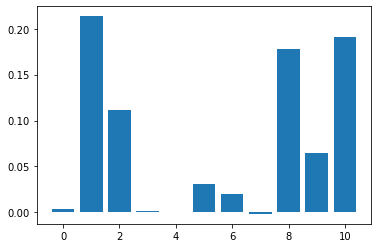

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv("ha.csv")
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
q1 = data.resting_blood_pressure.quantile(0.25)
q2 = data.resting_blood_pressure.quantile(0.75)
print(q1,q2)
IQR = q2-q1
print(IQR)
lower_limit = q1-1.5*IQR
upper_limit = q2+1.5*IQR
print(lower_limit,upper_limit)

q3 = data.cholesterol.quantile(0.25)
q4 = data.cholesterol.quantile(0.75)
print(q3,q4)
IQR = q4-q3
print(IQR)
lower_limit1 = q3-1.5*IQR
upper_limit1= q4+1.5*IQR
print(lower_limit1,upper_limit1)

q5 = data.max_heart_rate_achieved.quantile(0.25)
q6 = data.max_heart_rate_achieved.quantile(0.75)
print(q5,q6)
IQR = q6-q5
print(IQR)
lower_limit2 = q5-1.5*IQR
upper_limit2 = q6+1.5*IQR
print(lower_limit2,upper_limit2)

df_no_outlier =data[(data.resting_blood_pressure>lower_limit)&(data.resting_blood_pressure<upper_limit)&(data.cholesterol>lower_limit1)&(data.cholesterol<upper_limit1)&(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
X = df_no_outlier.drop('target',axis=1)
y = df_no_outlier['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
# fit the model
model.fit(X, y)
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Feature: 0, Score: -0.00334
Feature: 1, Score: 1.47435
Feature: 2, Score: 0.58123
Feature: 3, Score: -0.01012
Feature: 4, Score: 0.00373
Feature: 5, Score: 0.32959
Feature: 6, Score: 0.22562
Feature: 7, Score: -0.02788
Feature: 8, Score: 0.87980
Feature: 9, Score: 0.70746
Feature: 10, Score: 0.68701


/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


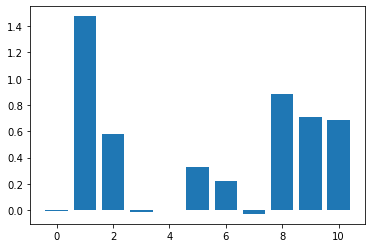

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06590
Feature: 1, Score: 0.05758
Feature: 2, Score: 0.13932
Feature: 3, Score: 0.09311
Feature: 4, Score: 0.08892
Feature: 5, Score: 0.01285
Feature: 6, Score: 0.00754
Feature: 7, Score: 0.10214
Feature: 8, Score: 0.03202
Feature: 9, Score: 0.06561
Feature: 10, Score: 0.33500


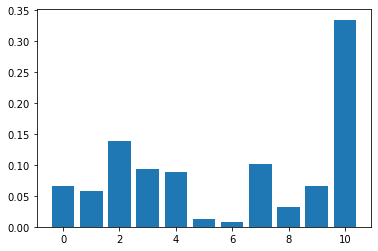

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.09232
Feature: 1, Score: 0.04347
Feature: 2, Score: 0.14033
Feature: 3, Score: 0.07795
Feature: 4, Score: 0.08541
Feature: 5, Score: 0.01051
Feature: 6, Score: 0.02877
Feature: 7, Score: 0.12711
Feature: 8, Score: 0.08331
Feature: 9, Score: 0.12943
Feature: 10, Score: 0.18138


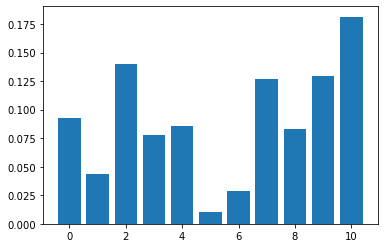

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/home/nisarga/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.02685
Feature: 1, Score: 0.07700
Feature: 2, Score: 0.13131
Feature: 3, Score: 0.02916
Feature: 4, Score: 0.02306
Feature: 5, Score: 0.03587
Feature: 6, Score: 0.02493
Feature: 7, Score: 0.03486
Feature: 8, Score: 0.06069
Feature: 9, Score: 0.03282
Feature: 10, Score: 0.52346


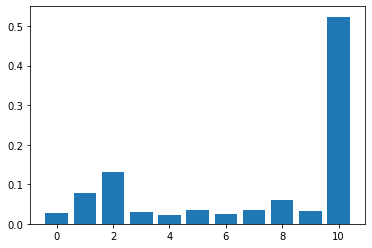

In [12]:
from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)

ValueError: Input X must be non-negative.

[0.07984188 0.0655327  0.12772103 0.08124047 0.0710324  0.02015211
 0.04114428 0.09806753 0.13802999 0.10872569 0.16851193]


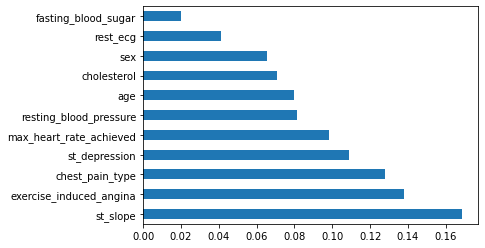

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [39]:
#n = df_no_outlier.drop('fasting_blood_sugar',axis = 1)
#n = n.drop('age',axis = 1)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
LogReg_clf = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 93.72%
Accuracy: 94.76%


,sex,chest_pain_type,resting_blood_pressure,cholesterol,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,1,2,140,289,0,172,0,0.0,1,0
1,0,3,160,180,0,156,0,1.0,2,1
2,1,2,130,283,1,98,0,0.0,1,0
3,0,4,138,214,0,108,1,1.5,2,1
4,1,3,150,195,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
1185,1,1,110,264,0,132,0,1.2,2,1
1186,1,4,144,193,0,141,0,3.4,2,1
1187,1,4,130,131,0,115,1,1.2,2,1
1188,0,2,130,236,2,174,0,0.0,2,1


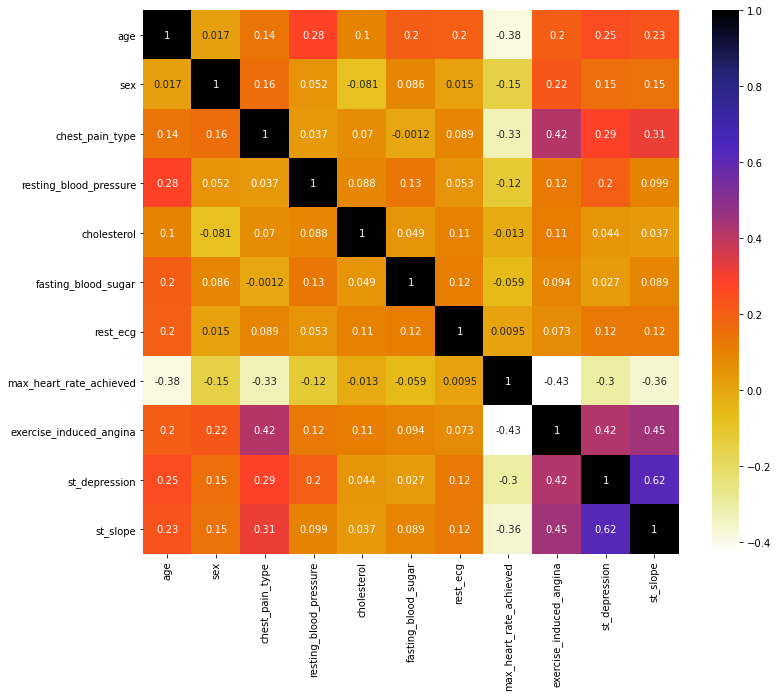

In [35]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.5)
len(set(corr_features))
corr_features


{'st_slope'}